# **BODY MEASUREMENT ANALYSIS**

**1.Import Libraries**

**Purpose:**
We import all necessary Python libraries for numerical computations, data handling, visualisation, and statistical analysis. Seaborn is used for enhanced plots, and SciPy for statistical measures.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


**Interpretation:**
The required libraries were successfully imported, enabling data analysis, visualisation, and statistical operations.


**2.Load Data**

**Purpose:**
Load male and female NHANES datasets directly  and store them as both pandas DataFrames and NumPy arrays.

In [7]:
male_path = 'adult_male_bmx.csv'
female_path = 'adult_female_bmx.csv'

male_df = pd.read_csv(male_path)
female_df = pd.read_csv(female_path)

male = male_df.values
female = female_df.values

malehead = male_df.head()
femalehead = female_df.head()

print("Male Dataset:")
print(malehead)
print("\n Female Datasets:")
print(femalehead)


Male Dataset:
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   98.8  182.3     42.0    40.1     38.2   108.2     120.4
1   74.3  184.2     41.1    41.0     30.2    94.5      86.8
2  103.7  185.3     47.0    44.0     32.0   107.8     109.6
3   86.0  167.8     39.5    38.4     29.0   106.4     108.3
4   99.4  181.6     40.4    39.9     36.0   120.2     107.0

 Female Datasets:
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2


**Interpretation:**
The male and female datasets were successfully loaded. Each dataset contains seven columns representing various body measurements such as weight, height, and circumferences.

**3.Histograms — Female (top) & Male (bottom) Weights**

**Purpose:**
Visualise the distribution of weights for females and males in separate subplots, keeping the x-axis scale consistent for accurate comparison.

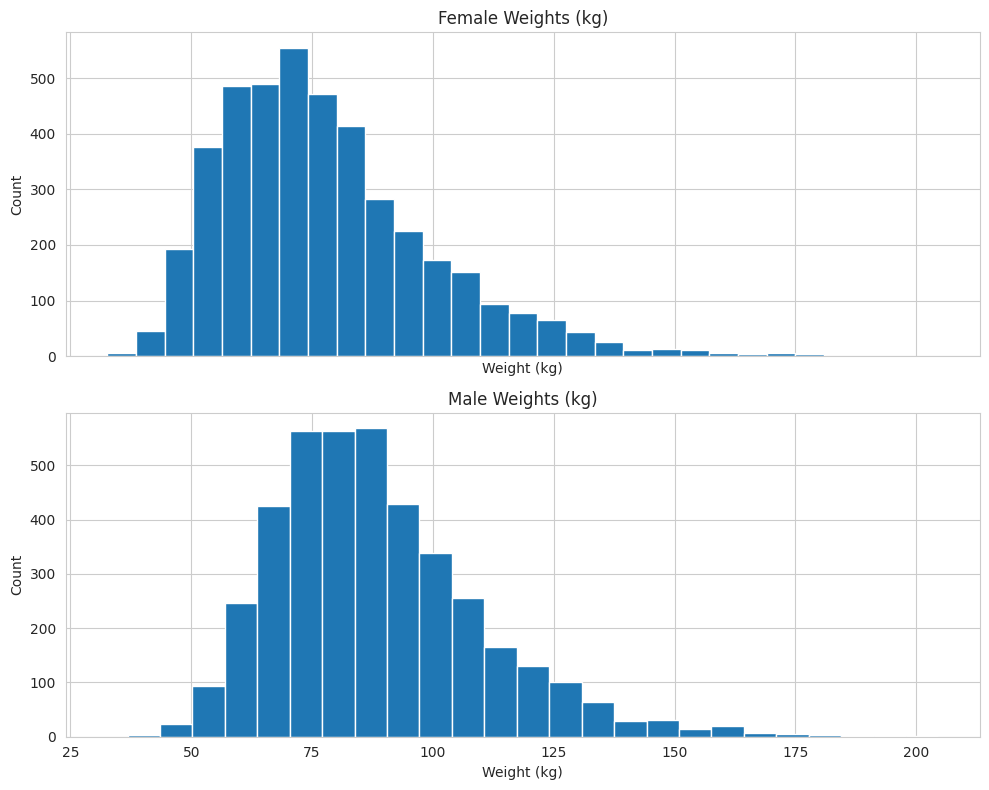

In [8]:
female_weight = female[:,0]
male_weight = male[:,0]

min_weight = min(np.nanmin(female_weight), np.nanmin(male_weight))
max_weight = max(np.nanmax(female_weight), np.nanmax(male_weight))
pad = (max_weight - min_weight) * 0.05
xmin, xmax = min_weight - pad, max_weight + pad

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))

ax1.hist(female_weight, bins=25)
ax1.set_title('Female Weights (kg)')
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Count')



ax2.hist(male_weight, bins=25)
ax2.set_title('Male Weights (kg)')
ax2.set_xlim(xmin, xmax)
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


**Interpretation:**
 Both distributions show a roughly bell-shaped pattern, though male weights tend to be higher on average. The consistent x-axis allows for easy visual comparison of spread and central tendency.



**4.Boxplot — Female vs Male Weights**

**Purpose:**
Compare the central tendency, variability, and outliers between male and female weight distributions using a side-by-side boxplot.

/tmp/ipython-input-1928565046.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weight, male_weight], labels=['Female', 'Male'])


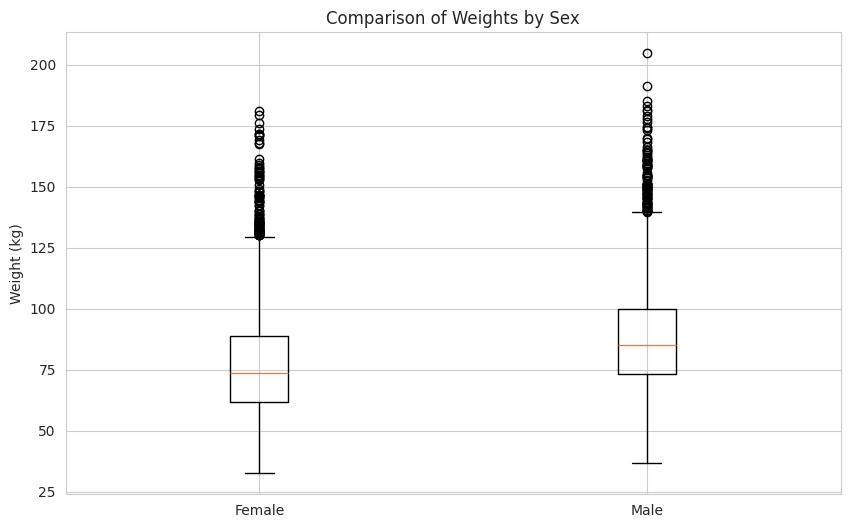

In [9]:
plt.boxplot([female_weight, male_weight], labels=['Female', 'Male'])
plt.ylabel('Weight (kg)')
plt.title('Comparison of Weights by Sex')
plt.show()


**Interpretation:**
Males exhibit a higher median weight and a wider range compared to females. Some outliers are visible in both groups, indicating individuals with unusually high or low weights.

**5.Numerical Aggregates**

**Purpose:**
Calculate descriptive statistics (mean, median, standard deviation, variance, skewness, and kurtosis) to quantitatively compare male and female weight distributions.

In [10]:
def aggregates(v):
    v = v[~np.isnan(v)]
    return {
        'Count': len(v),
        'Mean': np.mean(v),
        'Median': np.median(v),
        'Standard Deviation': np.std(v, ddof=1),
        'Variance': np.var(v, ddof=1),
        'Skewness': stats.skew(v, bias=False),
        'Kurtosis': stats.kurtosis(v, bias=False)
    }

def print_stats(title, stats_dict):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in stats_dict.items():
        print(f"{key:<10}: {value:.4f}")

female_stats = aggregates(female_weight)
male_stats = aggregates(male_weight)

print_stats("Female Weight Statistics", female_stats)
print_stats("Male Weight Statistics", male_stats)




Female Weight Statistics
------------------------
Count     : 4221.0000
Mean      : 77.4038
Median    : 73.6000
Standard Deviation: 21.5451
Variance  : 464.1896
Skewness  : 1.0337
Kurtosis  : 1.4041

Male Weight Statistics
----------------------
Count     : 4081.0000
Mean      : 88.3645
Median    : 85.0000
Standard Deviation: 21.4216
Variance  : 458.8833
Skewness  : 0.9846
Kurtosis  : 1.4776


**Interpretation:**
The statistics confirm that males have a higher average weight and greater variability. Skewness values close to zero suggest near-symmetric distributions, while kurtosis values provide insights into tail heaviness.

**6.Add BMI Column to Female**

**Purpose:**
Calculate BMI for each female participant using the formula:

BMI
=weight (kg)
/(
height (m)
)
^2

and append it as an eighth column to the female dataset.

In [11]:
# Calculating height in meters
female_height= female[:,1] / 100
# Calculating BMI and round to 2 decimals
female_bmi = np.round(female[:,0] / (female_height ** 2), 2)

female_with_bmi = np.column_stack([female, female_bmi])

female_df_with_bmi = female_df.copy()
female_df_with_bmi['BMI'] = female_bmi

female_BMI = female_df_with_bmi.head()
print("After Including BMI, The Dataset is:")
print(female_BMI)



After Including BMI, The Dataset is:
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST    BMI
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9  37.84
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1  39.07
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0  28.09
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5  24.90
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2  23.18


**Interpretation:**
The BMI column was successfully added. This new metric allows for more comprehensive health risk analysis alongside other body measurements.

**7.Standardise Female Data — zfemale**

**Purpose:**
Standardize each column of the female dataset into z-scores (mean = 0, std = 1) so that all measurements are comparable regardless of their original units.

In [12]:
# Calculating mean and standard deviation for each column
mean_each_col = np.mean(female_with_bmi, axis=0)
std_each_col = np.std(female_with_bmi, axis=0, ddof=1)

# Computing z-scores and round to 2 decimals
zfemale = np.round((female_with_bmi - mean_each_col) / std_each_col, 2)

pd.DataFrame(zfemale, columns=list(female_df.columns) + ['BMI']).head()



,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMI
0,0.91,0.01,-0.57,1.13,0.55,1.08,1.12,1.00
1,0.64,-1.05,-1.08,-1.29,1.03,1.04,0.27,1.16
2,-0.20,0.15,0.58,0.26,-0.16,-0.19,-0.37,-0.26
3,-0.73,-0.39,0.84,-0.76,-0.66,-0.52,-0.46,-0.67
4,-1.02,-0.78,-0.61,-0.98,-0.79,-1.07,-1.45,-0.89


**Interpretation:**
The zfemale matrix contains the standardized female dataset, with each column transformed to have a mean of 0 and a standard deviation of 1.
This allows for direct comparison across features like weight, height, and BMI, regardless of their original measurement scales.

**8.Pairplot & Correlations**

**Purpose:**
To visualise relationships between selected standardised measurements of female participants and quantify the strength and direction of these relationships using Pearson’s (linear) and Spearman’s (rank-based) correlation coefficients.

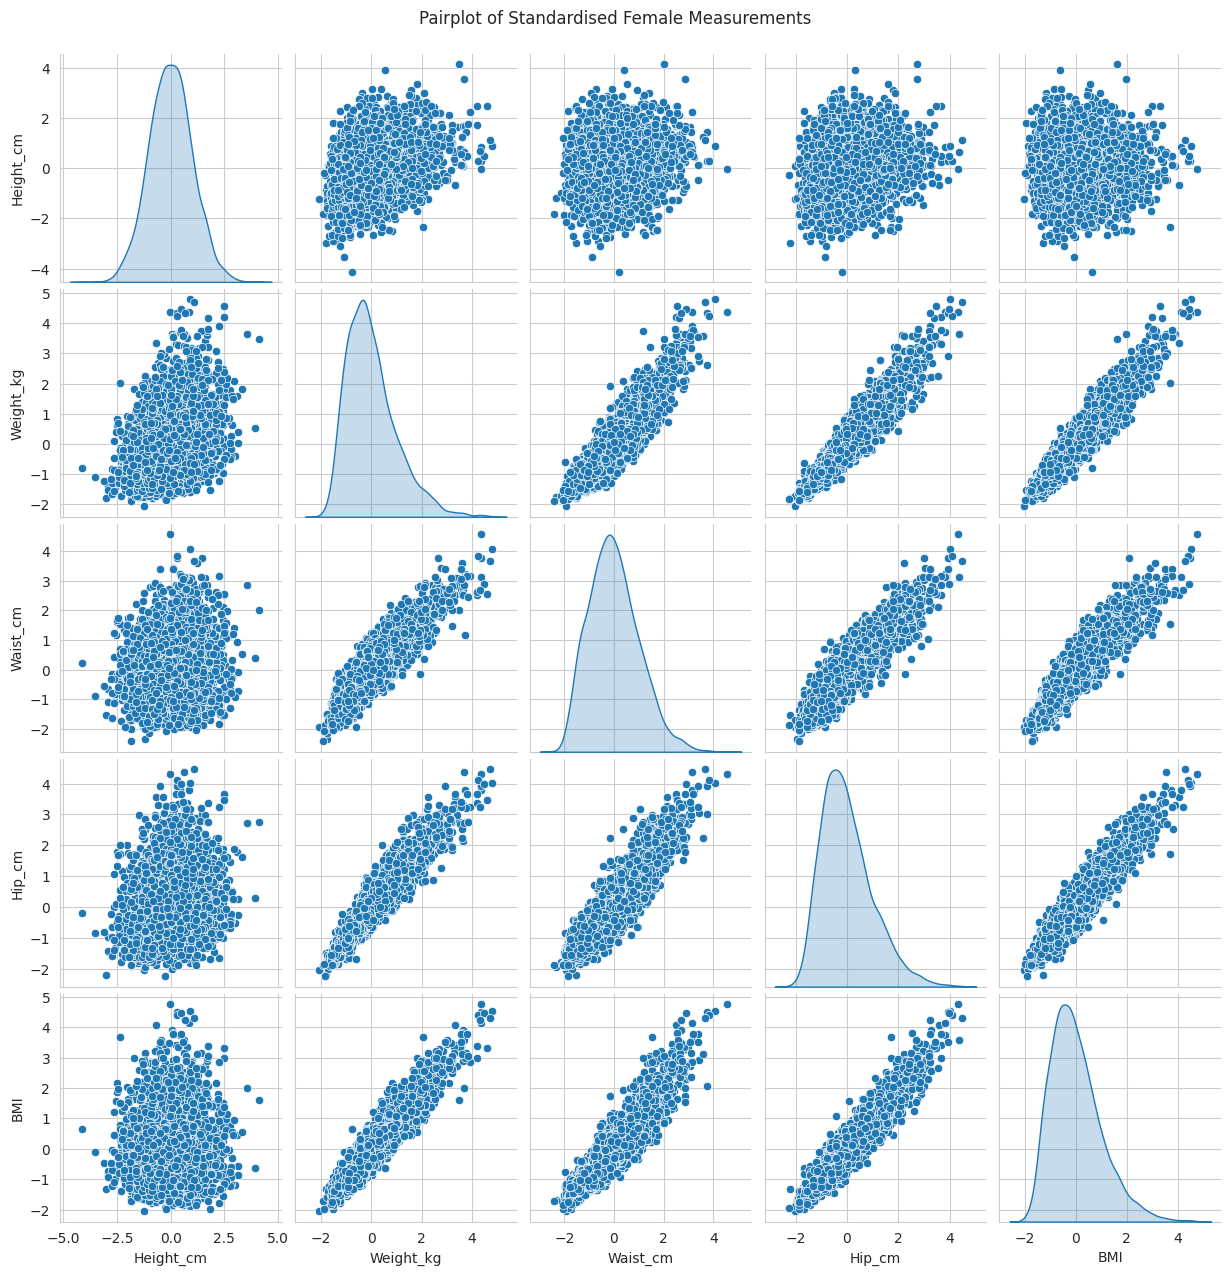


Pearson Correlation Matrix:
            Height_cm  Weight_kg  Waist_cm  Hip_cm   BMI
Height_cm       1.00       0.35      0.13    0.20  0.03
Weight_kg       0.35       1.00      0.90    0.95  0.95
Waist_cm        0.13       0.90      1.00    0.90  0.92
Hip_cm          0.20       0.95      0.90    1.00  0.94
BMI             0.03       0.95      0.92    0.94  1.00

Spearman Correlation Matrix:
            Height_cm  Weight_kg  Waist_cm  Hip_cm   BMI
Height_cm       1.00       0.34      0.11    0.21  0.02
Weight_kg       0.34       1.00      0.90    0.95  0.94
Waist_cm        0.11       0.90      1.00    0.89  0.92
Hip_cm          0.21       0.95      0.89    1.00  0.93
BMI             0.02       0.94      0.92    0.93  1.00


In [13]:

cols_index = [1, 0, 6, 5, 7]
cols_names = ['Height_cm', 'Weight_kg', 'Waist_cm', 'Hip_cm', 'BMI']
zfemale_df = pd.DataFrame(zfemale[:, cols_index], columns=cols_names)

# Scatterplot matrix (pairplot)
sns.pairplot(zfemale_df, diag_kind='kde')
plt.suptitle('Pairplot of Standardised Female Measurements', y=1.02)
plt.show()

# Computing correlations
pearson_corr = zfemale_df.corr(method='pearson')
spearman_corr = zfemale_df.corr(method='spearman')

print("\nPearson Correlation Matrix:\n", pearson_corr.round(2))
print("\nSpearman Correlation Matrix:\n", spearman_corr.round(2))


**Interpretation:**
The pairplot shows strong positive relationships between weight, waist circumference, hip circumference, and BMI, while height is less correlated with BMI.
Both Pearson and Spearman results confirm these strong associations, indicating consistency in both linear and rank-based relationships.

**9.Waist-to-Height & Waist-to-Hip Ratios**

**Purpose:**
Calculate waist-to-height and waist-to-hip ratios for both male and female participants, and add them as new columns to their respective matrices for further comparison.

In [14]:
# Female ratios
waist_height_f = female[:, 6] / female[:, 1]   # waist cm / height cm
waist_hip_f = female[:, 6] / female[:, 5]      # waist cm / hip cm


female_with_ratios = np.column_stack([female_with_bmi, waist_height_f, waist_hip_f])

waist_height_m = male[:, 6] / male[:, 1]
waist_hip_m = male[:, 6] / male[:, 5]

male_with_ratios = np.column_stack([male, waist_height_m, waist_hip_m])

print("Female matrix shape with BMI & ratios:", female_with_ratios.shape)
print("Male matrix shape with ratios:", male_with_ratios.shape)

# Column names
female_columns = list(female_df.columns) + ['BMI', 'Waist/Height', 'Waist/Hip']
male_columns = list(male_df.columns) + ['Waist/Height', 'Waist/Hip']

# Create DataFrames with rounding
female_df_with_ratios = pd.DataFrame(np.round(female_with_ratios, 2), columns=female_columns)
male_df_with_ratios = pd.DataFrame(np.round(male_with_ratios, 2), columns=male_columns)

print("Female Matrix (first 5 rows, rounded to 2 decimals:")
print(female_df_with_ratios.head())

print("\nMale Matrix (first 5 rows, rounded to 2 decimals):")
print(male_df_with_ratios.head())




Female matrix shape with BMI & ratios: (4221, 10)
Male matrix shape with ratios: (4081, 9)
Female Matrix (first 5 rows, rounded to 2 decimals:
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST    BMI  \
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9  37.84   
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1  39.07   
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0  28.09   
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5  24.90   
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2  23.18   

   Waist/Height  Waist/Hip  
0          0.74       0.93  
1          0.68       0.82  
2          0.57       0.87  
3          0.57       0.90  
4          0.47       0.79  

Male Matrix (first 5 rows, rounded to 2 decimals):
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST  Waist/Height  \
0   98.8  182.3     42.0    40.1     38.2   108.2     120.4          0.66   
1   74.3  184.2     41.1    41.0     30.2    94.5      8

**Interpretation:**
The displayed matrices show BMI along with waist-to-height and waist-to-hip ratios for both sexes, rounded to two decimals for clarity.
These ratios provide a clear, concise view of each participant’s body composition, making it easier to spot patterns or outliers.

**10.Boxplot — Ratios**

**Purpose:**
Compare the distribution of waist-to-height and waist-to-hip ratios for both males and females using a single box-and-whisker plot with four boxes side by side.

/tmp/ipython-input-1305796062.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


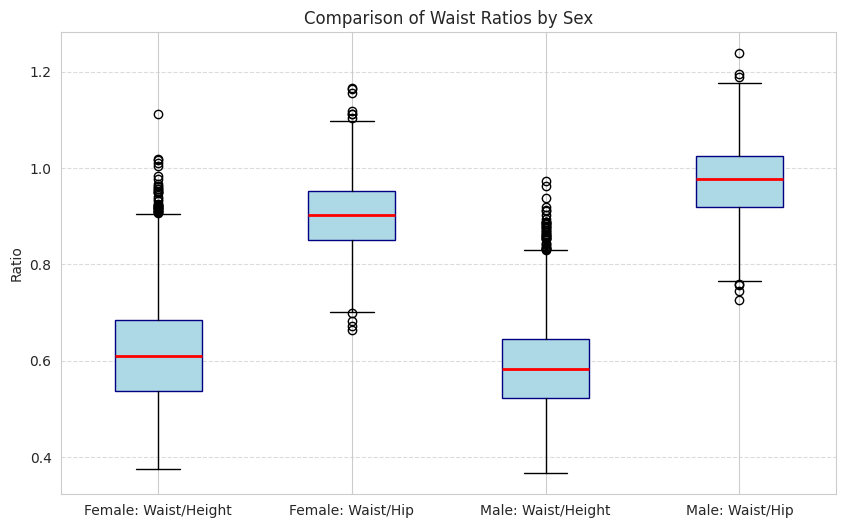

In [15]:
data_to_plot = [
    waist_height_f[~np.isnan(waist_height_f)],
    waist_hip_f[~np.isnan(waist_hip_f)],
    waist_height_m[~np.isnan(waist_height_m)],
    waist_hip_m[~np.isnan(waist_hip_m)]
]

labels = ['Female: Waist/Height', 'Female: Waist/Hip',
          'Male: Waist/Height', 'Male: Waist/Hip']
#Box Plot
plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='navy'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Ratio')
plt.title('Comparison of Waist Ratios by Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interpretation:**
Males generally have higher waist-to-height ratios, suggesting greater central fat accumulation compared to females.
Waist-to-hip ratios are closer between sexes but still slightly higher for males, reflecting differences in body fat distribution patterns.

**11.Advantages & Disadvantages**

**BMI (Body Mass Index)**
- **Advantages:** Simple to calculate, widely used in public health, useful for population-level screening.
- **Disadvantages:** Does not distinguish between fat and muscle, ignores fat distribution, may misclassify muscular individuals.

**Waist-to-Height Ratio (WHtR)**
- **Advantages:** Accounts for central obesity, easy to interpret (e.g: <0.5 often considered healthy), better predictor of cardiovascular risk than BMI in some cases.
- **Disadvantages:** Requires accurate waist measurement, does not differentiate between visceral and subcutaneous fat.

**Waist-to-Hip Ratio (WHR)**
- **Advantages:** Reflects fat distribution pattern (apple vs pear shape), associated with metabolic and cardiovascular risk.
- **Disadvantages:** Influenced by hip size variability, thresholds vary by sex and ethnicity, requires two measurements.

REFERENCES:All the theory sentences are written with the help of chatgpt.

**12.Lowest & Highest BMI Females**

**Purpose:**
Identify and display the standardised body measurements of the 5 lowest-BMI and 5 highest-BMI female participants to compare differences in their body composition.

In [16]:
# Sort by BMI
sorted_index = np.argsort(female_with_bmi[:, -1])

# Indices for lowest and highest BMI
low_index = sorted_index[:5]
high_index = sorted_index[-5:]

# DataFrame for zfemale
zfemale_df = pd.DataFrame(
    zfemale,
    columns=list(female_df.columns) + ['BMI']
)

print("Lowest 5 BMI (Standardised values):")
print(zfemale_df.iloc[low_index].round(2))

print("\nHighest 5 BMI (Standardised values):")
print(zfemale_df.iloc[high_index].round(2))


Lowest 5 BMI (Standardised values):
      BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST   BMI
262   -2.08  -1.22    -1.55   -1.17    -2.19   -2.04     -1.94 -2.05
3478  -1.88  -0.19    -1.72    0.39    -2.44   -1.85     -2.06 -1.99
2126  -1.54   1.81     0.63    0.57    -2.27   -1.68     -1.71 -1.97
2753  -1.84  -0.26    -0.23    0.51    -2.30   -2.25     -1.86 -1.94
1209  -1.61   0.89    -0.10    0.48    -2.21   -1.83     -1.71 -1.89

Highest 5 BMI (Standardised values):
      BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST   BMI
2268   4.25   0.29     1.86   -0.98     2.37    4.10      3.82  4.40
3022   4.46   0.50     1.69   -1.14     3.35    3.98      2.90  4.46
1472   4.35   0.28     2.84    1.94     4.37    3.92      3.75  4.51
1104   4.80   0.89     2.12    1.82     3.78    4.02      4.08  4.54
1096   4.36  -0.03    -0.06   -0.17     2.78    4.32      4.57  4.76


**Interpretation:**
Lowest-BMI individuals show below-average z-scores for weight, waist, hip, and BMI, indicating smaller body sizes overall.
Highest-BMI individuals have consistently above-average z-scores across these measurements, reflecting larger body composition and higher adiposity.